In [1]:
import sklearn
from sklearn.datasets import load_wine

In [2]:
wineD = load_wine()
print(wineD.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [4]:
type(wineD)

sklearn.utils._bunch.Bunch

In [5]:
wineD.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
print(wineD.target)
print(wineD.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']


In [7]:
wineD.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine_df = pd.DataFrame(data=wineD.data, columns=wineD.feature_names)

In [9]:
wine_df['Class'] = wineD.target

In [10]:
wine_df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0,0
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0,1
17,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0,0
20,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685.0,2


In [11]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Class

In [12]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Class                           0
dtype: int64

<Axes: xlabel='alcohol', ylabel='Class'>

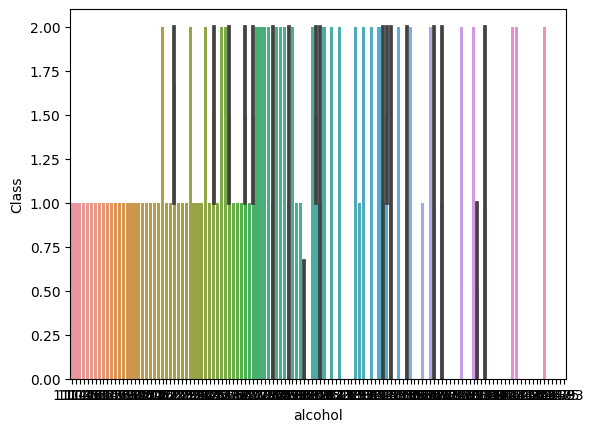

In [13]:
import seaborn as sns

sns.barplot(data=wine_df, x='alcohol', y='Class')

In [14]:
wine_df.alcohol.max()

14.83

In [15]:
wine_df.alcohol.min()

11.03

In [16]:
wine_df['alcohol_content'] = wine_df['alcohol'].round()
wine_df['alcohol_content'].sample(10)

159    13.0
116    12.0
105    12.0
69     12.0
18     14.0
90     12.0
55     14.0
36     13.0
98     12.0
11     14.0
Name: alcohol_content, dtype: float64

<Axes: xlabel='Class', ylabel='proline'>

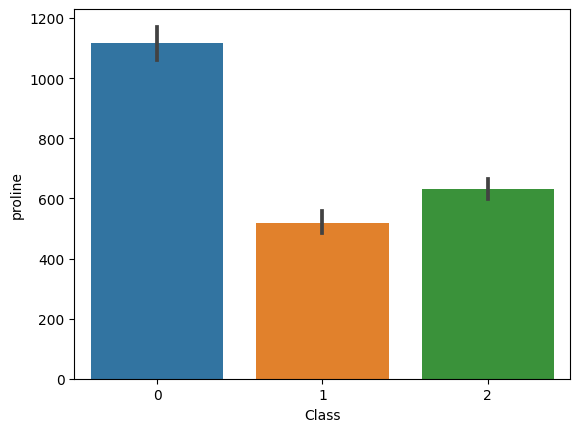

In [17]:
sns.barplot(data=wine_df, x='Class', y='proline')

In [18]:
print(wineD.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [19]:
wine_df.drop(labels='alcohol', axis=1)

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class,alcohol_content
0,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,14.0
1,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.0
2,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.0
3,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,14.0
4,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,14.0
174,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,13.0
175,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,13.0
176,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,13.0


In [20]:
# 여기부터는 학습

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
type(wine_df)

pandas.core.frame.DataFrame

In [23]:
x = wine_df.drop(columns='Class').drop(columns='alcohol')
y = wine_df.Class
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop(columns='Class'), wine_df['Class'], test_size=0.2)

In [24]:
# DecisionTree 학습

decisiontreeModel = DecisionTreeClassifier()
decisiontreeModel.fit(X_train, y_train)
pred = decisiontreeModel.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9444444444444444


In [25]:
# RandomForest 학습

randomforestModel = RandomForestClassifier()
randomforestModel.fit(X_train, y_train)
pred = randomforestModel.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

1.0


In [26]:
# Logistic Regression 학습

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
import math

wineD = load_wine()
x = wineD.data
y = wineD.target
accuracy_arr = []

print("\n")
for i in range(5):

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    # Random Forest 모델 학습
    lr_classifier = LogisticRegression(max_iter=10000)
    lr_classifier.fit(X_train, y_train)

    # 테스트 데이터 예측
    pred = lr_classifier.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, pred)
    print(f"Act{i:2}| Accuracy:", accuracy)
    accuracy_arr.append(accuracy)

print(f"\n[Average Accuracy: {round((sum(accuracy_arr)/len(accuracy_arr)), 4) * 100} %]\n")



Act 0| Accuracy: 0.9444444444444444
Act 1| Accuracy: 0.9166666666666666
Act 2| Accuracy: 0.9722222222222222
Act 3| Accuracy: 0.8888888888888888
Act 4| Accuracy: 0.9722222222222222

[Average Accuracy: 93.89 %]



In [27]:
from sklearn.model_selection import GridSearchCV
# 하이퍼 파라미터 후보 값 지정
param = {
    'max_depth' : [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf' : [1,5,10, 15, 20,30,100],
    'min_samples_split' : [5, 10, 15, 20, 30]
}

In [28]:
grid_decisiontreeModel = GridSearchCV(decisiontreeModel, param_grid=param, scoring='accuracy', cv=5)
grid_decisiontreeModel.fit(X_train, y_train)

print(f"Best Parameters: {grid_decisiontreeModel.best_params_}")

pred_withBP = grid_decisiontreeModel.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred_withBP))

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.9722222222222222


In [29]:
grid_randomforestModel = GridSearchCV(randomforestModel, param_grid=param, scoring='accuracy', cv=5)
grid_randomforestModel.fit(X_train, y_train)

print(f"Best Parameters: {grid_randomforestModel.best_params_}")

pred_withBP = grid_randomforestModel.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred_withBP))

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 15}
1.0


In [30]:
def HC_DecisionTree(x, y):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import GridSearchCV

    # 정확도 평균 계산용 배열
    accuracy_arr = []

    # 하이퍼 파라미터 후보 값 지정
    param = {
        'max_depth' : [1, 2, 3, 4],
        'min_samples_leaf' : [1, 2, 3, 4],
        'min_samples_split' : [4, 5, 6, 7, 8]
    }

    for i in range(10):
        # 데이터 분할(8 : 2)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # DecisionTree모델 생성&학습
        dt_classifier = DecisionTreeClassifier(random_state=None)
        grid_dt_classifier = GridSearchCV(dt_classifier, param_grid=param, scoring='accuracy', cv=5, n_jobs=-1)
        grid_dt_classifier.fit(X_train, y_train)

        pred_withBP = grid_dt_classifier.best_estimator_.predict(X_test)
        accuracy = accuracy_score(y_test, pred_withBP)
        accuracy_arr.append(accuracy)
    print(f"\n[DecisionTree Average Accuracy: {round((sum(accuracy_arr)/len(accuracy_arr)), 4) * 100} %]")


def HC_RandomForest(x, y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import GridSearchCV

    # 정확도 평균 계산용 배열
    accuracy_arr = []

    # 하이퍼 파라미터 후보 값 지정
    param = {
        'max_depth' : [1, 2, 3, 4],
        'min_samples_leaf' : [1, 2, 3, 4],
        'min_samples_split' : [4, 5, 6, 7, 8]
    }

    for i in range(5):
        # 데이터 분할(8 : 2)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # DecisionTree모델 생성&학습
        rf_classifier = RandomForestClassifier(random_state=None)
        grid_rf_classifier = GridSearchCV(rf_classifier, param_grid=param, scoring='accuracy', cv=5, n_jobs=-1)
        grid_rf_classifier.fit(X_train, y_train)

        pred_withBP = grid_rf_classifier.best_estimator_.predict(X_test)
        accuracy = accuracy_score(y_test, pred_withBP)
        accuracy_arr.append(accuracy)

        #/print(f"HyperParameters: {grid_dt_classifier.best_params_}")

    print(f"\n[RandomForest Average Accuracy: {round((sum(accuracy_arr)/len(accuracy_arr)), 4) * 100} %]")


def HC_LogisticRegression(x, y):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import GridSearchCV

    accuracy_arr = []

    # 하이퍼 파라미터 후보 값 지정
    param = {
        'max_depth' : [1, 2, 3, 4],
        'min_samples_leaf' : [1, 2, 3, 4],
        'min_samples_split' : [4, 5, 6, 7, 8]
    }

    for i in range(5):
        # 데이터 분할(8 : 2)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # LogisticRegression모델 생성&학습
        lr_classifier = LogisticRegression(max_iter=10000)
        lr_classifier.fit(X_train, y_train)

        # 테스트 데이터 예측
        pred = lr_classifier.predict(X_test)

        # 정확도 계산
        accuracy = accuracy_score(y_test, pred)
        accuracy_arr.append(accuracy)

    print(f"\n[LogisticRegression Average Accuracy: {round(accuracy_score(y_test, pred), 4) * 100} %]\n")

In [31]:
from sklearn.datasets import load_wine

wineD = load_wine()
x = wineD.data
y = wineD.target

HC_DecisionTree(x, y)
HC_RandomForest(x, y)
HC_LogisticRegression(x, y)


[DecisionTree Average Accuracy: 85.28 %]

[RandomForest Average Accuracy: 97.22 %]

[LogisticRegression Average Accuracy: 97.22 %]

